In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np

In [84]:
dylan_df = pd.read_pickle('./dylan/corpus.pkl')

In [85]:
dylan_df.index = dylan_df.song

dylan_df.head()

,song,album,lyrics,year,genre
song,,,,,
The Ballad of Frankie Lee and Judas Priest,The Ballad of Frankie Lee and Judas Priest,John Wesley Harding,well frankie lee and judas priest they were th...,1967,Country
As I Went Out One Morning,As I Went Out One Morning,John Wesley Harding,as i went out one morning to breathe the air a...,1967,Country
All Along the Watchtower,All Along the Watchtower,John Wesley Harding,there must be some way out of here said the jo...,1967,Country
I Dreamed I Saw St. Augustine,I Dreamed I Saw St. Augustine,John Wesley Harding,i dreamed i saw st augustine alive as you or m...,1967,Country
The Wicked Messenger,The Wicked Messenger,John Wesley Harding,there was a wicked messenger from eli he did c...,1967,Country


In [86]:
from textblob import TextBlob

In [87]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

dylan_df['polarity'] = dylan_df['lyrics'].apply(pol)
dylan_df['subjectivity'] = dylan_df['lyrics'].apply(sub)

In [88]:
dylan_df['year'] = dylan_df['year'].apply(pd.to_numeric)
dylan_df

,song,album,lyrics,year,genre,polarity,subjectivity
song,,,,,,,
The Ballad of Frankie Lee and Judas Priest,The Ballad of Frankie Lee and Judas Priest,John Wesley Harding,well frankie lee and judas priest they were th...,1967,Country,0.041510,0.447216
As I Went Out One Morning,As I Went Out One Morning,John Wesley Harding,as i went out one morning to breathe the air a...,1967,Country,-0.016667,0.869444
All Along the Watchtower,All Along the Watchtower,John Wesley Harding,there must be some way out of here said the jo...,1967,Country,0.141667,0.411111
I Dreamed I Saw St. Augustine,I Dreamed I Saw St. Augustine,John Wesley Harding,i dreamed i saw st augustine alive as you or m...,1967,Country,0.010000,0.540000
The Wicked Messenger,The Wicked Messenger,John Wesley Harding,there was a wicked messenger from eli he did c...,1967,Country,0.120000,0.580000
I'll Be Your Baby Tonight,I'll Be Your Baby Tonight,John Wesley Harding,close your eyes close the door you dont have t...,1967,Country,-0.171429,0.742857
Drifter's Escape,Drifter's Escape,John Wesley Harding,oh help me in my weakness i heard the drifter ...,1967,Country,-0.072685,0.464352
I Pity the Poor Immigrant,I Pity the Poor Immigrant,John Wesley Harding,i pity the poor immigrant who wishes he wouldv...,1967,Country,-0.181250,0.484375
Down Along the Cove,Down Along the Cove,John Wesley Harding,down along the cove i spied my true love comin...,1967,Country,0.232870,0.484568


In [89]:

def plot_song_polarity_over_time(text, title, split=10):
    polarity = []
    split_list = []

    length = len(text)
    size = math.floor(length / split)
    start = np.arange(0, length, size)

    for piece in range(split):
        split_list.append(text[start[piece]:start[piece]+size])

    for lp in split_list:
        polarity.append(TextBlob(lp).sentiment.polarity)


    fig,ax = plt.subplots()    
    plt.plot(polarity)
    plt.plot(np.arange(0,split), np.zeros(split))
    ax.set_title(title)
    plt.show()

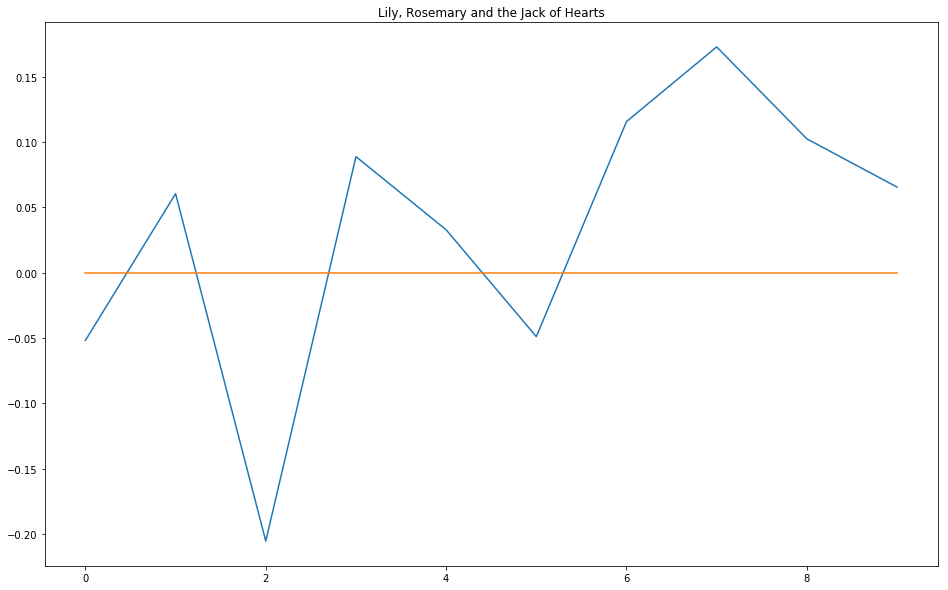

In [137]:
plot_song_polarity_over_time(dylan_df['lyrics'][165], dylan_df['song'][167])

In [91]:

plt.rcParams['figure.figsize'] = [16, 10]

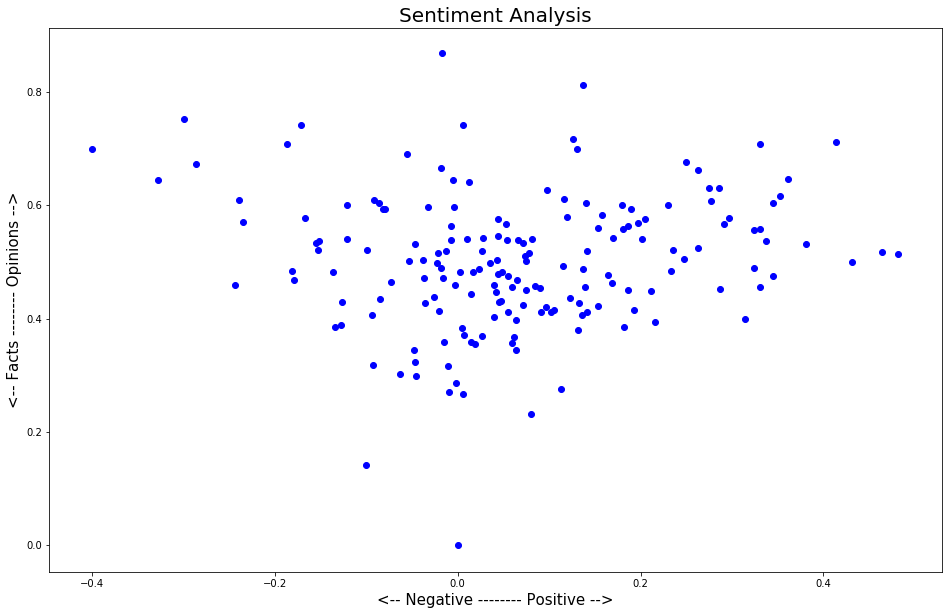

In [92]:
for index, song in enumerate(dylan_df.index):
    x = dylan_df.polarity.loc[song]
    y = dylan_df.subjectivity.loc[song]
    plt.scatter(x, y, color='blue')
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

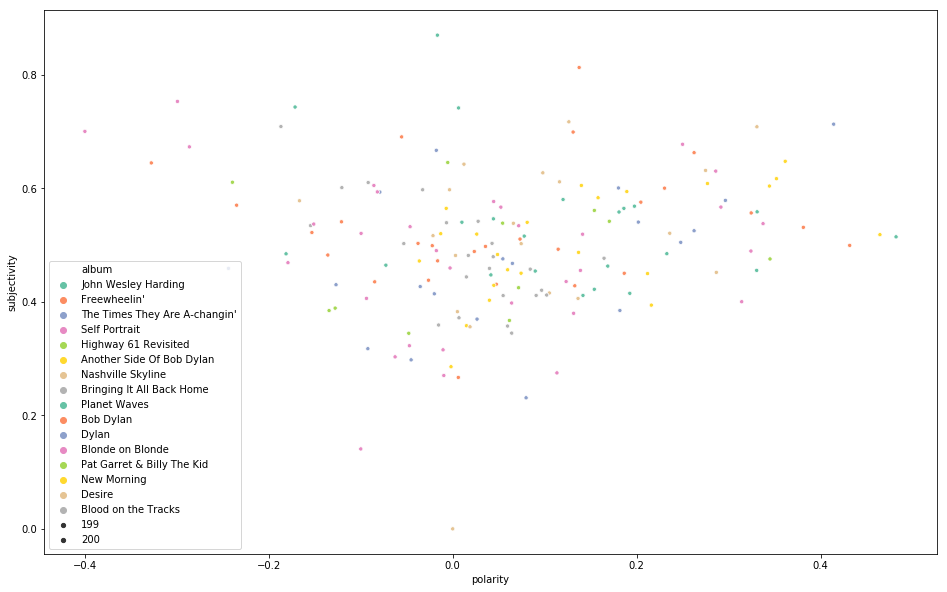

In [136]:
sns.scatterplot(x='polarity', y = 'subjectivity', hue='album', data=dylan_df, palette="Set2")

In [95]:
dylan_df.describe()

,year,polarity,subjectivity
count,176.000000,176.000000,176.000000
mean,1968.090909,0.065602,0.501040
std,4.402951,0.159494,0.120161
min,1962.000000,-0.400000,0.000000
25%,1964.000000,-0.021640,0.428679
50%,1967.000000,0.053324,0.500714
75%,1970.000000,0.159706,0.575645
max,1976.000000,0.482143,0.869444


In [96]:
import numpy as np
import math

def split_text(text, n=5):
    text_len = len(text)
    parts = math.floor(text_len / n)
    start = np.arange(0, text_len, parts)
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+parts])
    return split_list

In [97]:
# Get polarity of song
positive_songs = dylan_df[dylan_df.polarity > 0]
negative_songs = dylan_df[dylan_df.polarity < 0]

In [98]:
positive_songs = positive_songs.sort_values(by = 'polarity', ascending=False)
negative_songs = negative_songs.sort_values(by = 'polarity')

In [99]:
positive_songs.head()

,song,album,lyrics,year,genre,polarity,subjectivity
song,,,,,,,
You Angel You,You Angel You,Planet Waves,you angel you you got me under your wing the w...,1974,Rock,0.482143,0.514286
One More Weekend,One More Weekend,New Morning,slippin and slidin like a weasel on the run im...,1970,Country,0.464609,0.518107
Blowin' in the Wind,Blowin' in the Wind,Freewheelin',how many roads must a man walk down before you...,1963,Folk,0.431746,0.499206
Can't Help Falling in Love,Can't Help Falling in Love,Dylan,wise men say only fools rush in but i cant hel...,1973,Country,0.414286,0.712698
"Honey, Just Allow Me One More Chance","Honey, Just Allow Me One More Chance",Freewheelin',honey just allow me one more chance to get alo...,1963,Folk,0.381287,0.530994


In [100]:
negative_songs.head()

,song,album,lyrics,year,genre,polarity,subjectivity
song,,,,,,,
All The Tired Horses,All The Tired Horses,Self Portrait,all the tired horses in the sun howm i suppose...,1970,Country,-0.400000,0.700000
"Baby, Let Me Follow You Down","Baby, Let Me Follow You Down",Bob Dylan,baby let me follow you down baby let me follow...,1962,Folk,-0.327778,0.644444
It Hurts Me Too,It Hurts Me Too,Self Portrait,so run here baby put your little hands in mine...,1970,Country,-0.299369,0.752778
Gotta Travel On,Gotta Travel On,Self Portrait,done laid around done stayed around this old t...,1970,Country,-0.286364,0.672727
Ballad of Hollis Brown,Ballad of Hollis Brown,The Times They Are A-changin',hollis brown he lived on the outside of town h...,1964,Folk,-0.243855,0.458754


In [101]:
albums = dylan_df.groupby('album')

In [102]:
album_polarity = pd.Series(albums.polarity.mean())

In [103]:
album_subjectivity = pd.Series(albums.subjectivity.mean())

In [128]:
hits = ["Blowin' in the Wind", 
       "It's All Over Now, Baby Blue",
        "Subterranean Homesick Blues",
       "Like a Rolling Stone",
       "If You See Her, Say Hello",
        "Lay, Lady, Lay",
       "Hurricane"]

In [129]:
hits_df = dylan_df.loc[hits]

In [130]:
hits_df

,song,album,lyrics,year,genre,polarity,subjectivity
song,,,,,,,
Blowin' in the Wind,Blowin' in the Wind,Freewheelin',how many roads must a man walk down before you...,1963,Folk,0.431746,0.499206
"It's All Over Now, Baby Blue","It's All Over Now, Baby Blue",Bringing It All Back Home,you must leave now take what you need you thin...,1965,Rock,-0.015385,0.358974
Subterranean Homesick Blues,Subterranean Homesick Blues,Bringing It All Back Home,johnnys in the basement mixing up the medicine...,1965,Rock,0.054829,0.410790
Like a Rolling Stone,Like a Rolling Stone,Highway 61 Revisited,once upon a time you dressed so fine you threw...,1965,Rock,0.154007,0.560788
"If You See Her, Say Hello","If You See Her, Say Hello",Blood on the Tracks,if you see her say hello she might be in tangi...,1975,Rock,0.096709,0.420238
"Lay, Lady, Lay","Lay, Lady, Lay",Nashville Skyline,lay lady lay lay across my big brass bed lay l...,1969,Country,0.105128,0.415385
Hurricane,Hurricane,Desire,pistol shots ring out in the barroom night ent...,1976,Rock,0.003061,0.481479


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

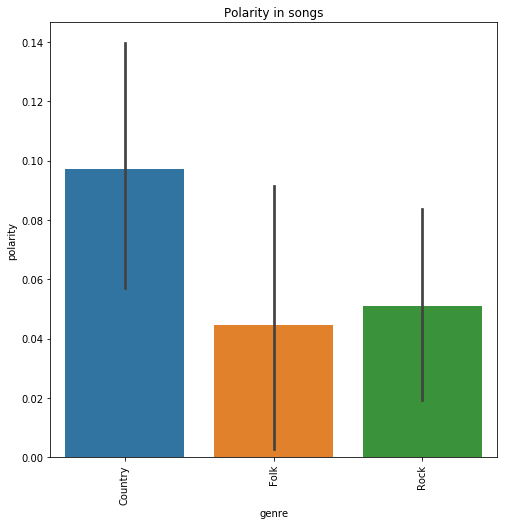

In [135]:
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x='genre', y='polarity', data=dylan_df, ax =ax)
ax.set_title("Polarity in songs")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

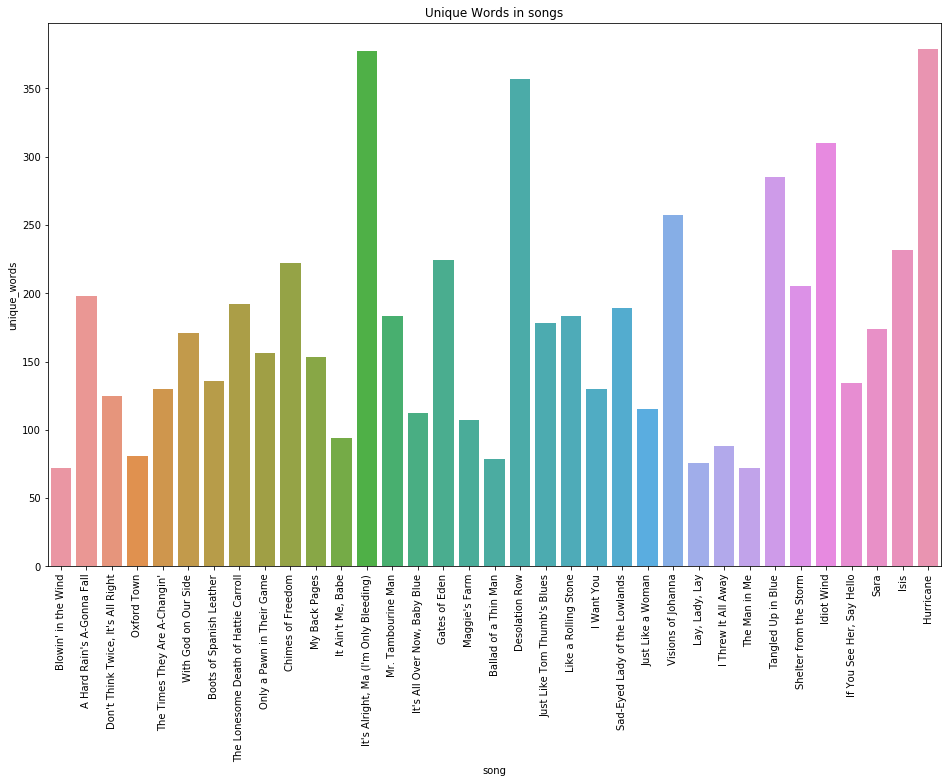

In [25]:
fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(x='song', y='unique_words', data=hits_df, ax =ax)
ax.set_title("Unique Words in songs")
plt.xticks(rotation=90)

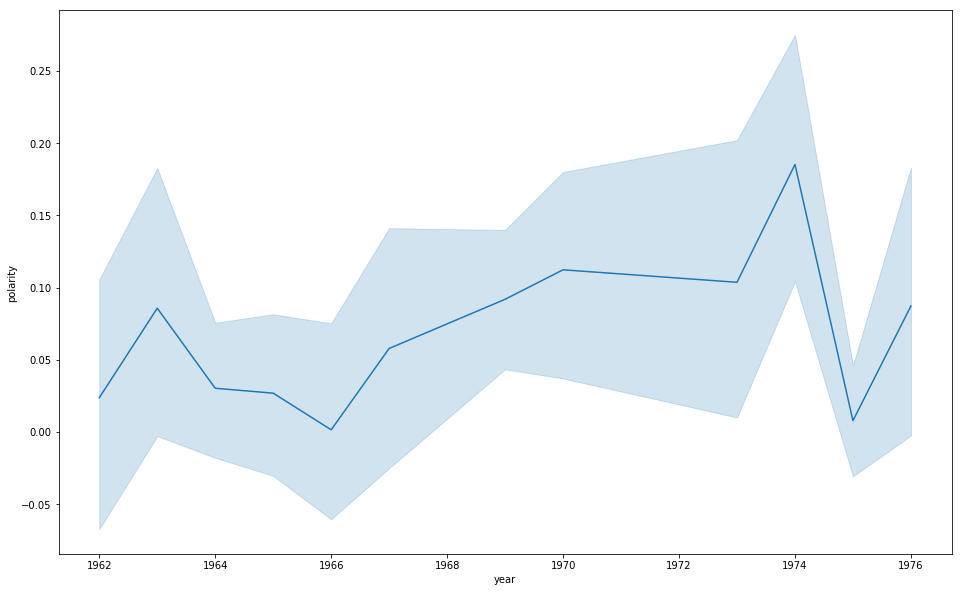

In [134]:
sns.lineplot(x='year', y = 'polarity', data=dylan_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

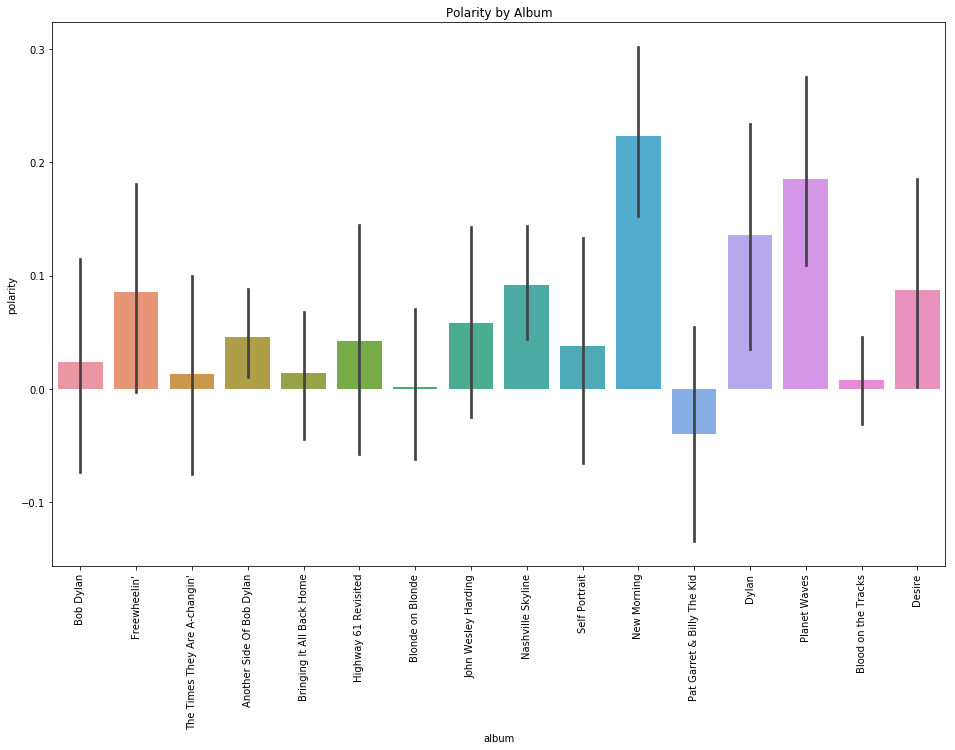

In [66]:
fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(x='album', y = 'polarity', data=dylan_df, ax=ax, order=["Bob Dylan",
                                                                        "Freewheelin'",
                                                                       "The Times They Are A-changin'",
                                                                        "Another Side Of Bob Dylan",
                                                                       "Bringing It All Back Home",
                                                                       "Highway 61 Revisited",
                                                                       "Blonde on Blonde",
                                                                        "John Wesley Harding",
                                                                       "Nashville Skyline",
                                                                       "Self Portrait",
                                                                       "New Morning",
                                                                       "Pat Garret & Billy The Kid",
                                                                       "Dylan",
                                                                       "Planet Waves",
                                                                       "Blood on the Tracks",
                                                                       "Desire"])
ax.set_title("Polarity by Album")
plt.xticks(rotation=90)